# **주요 내용**

*   실험

In [0]:
notebookName = "20200517_3"
notebookName

'20200517_3'

In [0]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4692090210466015563, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3431188194549912596
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17170094924795530266
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11915555024474294641
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [0]:
!nvidia-smi

Sun May 17 15:13:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    33W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**파일 압축 해제 (드라이브에는 *.zip 파일 형식으로 저장되어 있음)**

In [0]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path):
    os.mkdir(pcm_path)

if not os.path.exists(wav_path):
    os.mkdir(wav_path)

# unzip with quite mode (-q options)
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

['GSF07132LCY0', 'I4F05625JSY0', 'I4F03543KSY0', 'I4F03922LKY0', 'GSF03031LJH0']
50


***.pcm to *.wav**

In [0]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))): # sorted!!!
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)): # sorted!!!
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 50
num_features = 100
data_length = 3 ** 8   # 6,561

train_rate = 0.8
num_train_data = int(num_features * train_rate) # 80

select_train_data = [True] * num_train_data + [False] * (num_features - num_train_data)
select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

# naming
save_train_data_name = 'train_data'
save_train_labels_name = 'train_labels'

save_test_data_name = 'test_data'
save_test_labels_name = 'test_labels'

**train data, test data로 구분하여 numpy 저장 (*.npz)**

In [0]:
# save features as *.npz format

from scipy.io import wavfile

data = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        data[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_data = data[select_train_data * num_labels]
train_labels = labels[select_train_data * num_labels]

test_data = data[select_test_data * num_labels]
test_labels = labels[select_test_data * num_labels]

# save *.npy        
np.save("./" + save_train_data_name, train_data)
np.save("./" + save_train_labels_name, train_labels)

np.save("./" + save_test_data_name, test_data)
np.save("./" + save_test_labels_name, test_labels)

print("train_data.shape: {}, train_labels.shape: {}".format(train_data.shape, train_labels.shape))
print("test_data.shape: {}, test_labels.shape: {}".format(test_data.shape, test_labels.shape))

train_data.shape: (4000, 6561), train_labels.shape: (4000,)
test_data.shape: (1000, 6561), test_labels.shape: (1000,)


In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def my_split(train_data, train_labels):
    test_size = 0.2

    X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size = test_size)

    x_train = X_train.reshape(len(X_train), data_length, 1)
    x_val = X_val.reshape(len(X_val), data_length, 1) 

    y_train = to_categorical(Y_train)
    y_val = to_categorical(Y_val)

    # standarization
    mean = x_train.mean()
    x_train -= mean
    std = x_train.std()
    x_train /= std

    x_val -= mean
    x_val /= std

    return x_train, y_train, x_val, y_val, mean, std

**Build Model**

In [0]:
def build_model_1(model_input, i):
    # block 1
    x = layers.Conv1D(name = "block1_conv1", filters = 32, kernel_size = 3, strides = 1, padding = "same")(model_input)
    x = layers.BatchNormalization(name = "block1_conv1_bn")(x)

    x = layers.Conv1D(name = "block1_conv2", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv2_bn")(x)
    x = layers.ReLU(name = "block1_conv2_act")(x)

    x = layers.MaxPooling1D(name = "block1_pool", pool_size = 3)(x)

    # block 2
    x = layers.Conv1D(name = "block2_conv1", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block2_conv2", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv2_bn")(x)    
    x = layers.ReLU(name = "block2_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block2_pool", pool_size = 3)(x)

    # block 3
    x = layers.Conv1D(name = "block3_conv1", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block3_conv2", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv2_bn")(x)    
    x = layers.ReLU(name = "block3_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block3_pool", pool_size = 3)(x)

    # out
    x = layers.GlobalAveragePooling1D(name = "avg_pool")(x)
    x = layers.Dropout(rate = 0.4, name = "dropout")(x)
    out = layers.Dense(num_labels, activation = 'softmax', name = "predictions")(x)

    model = Model(model_input, out, name = "without_sfconv_{}".format(i))
    print("model name: {}".format(model.name))
    return model

In [0]:
def build_model_2(model_input, i):
    # block 0
    x = layers.Conv1D(name = "block0_sfconv", filters = 1, kernel_size = 2, strides = 1, padding = "same")(model_input)
    x = layers.Add(name = "add")([model_input, x])

    # block 1
    x = layers.Conv1D(name = "block1_conv1", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv1_bn")(x)

    x = layers.Conv1D(name = "block1_conv2", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv2_bn")(x)
    x = layers.ReLU(name = "block1_conv2_act")(x)

    x = layers.MaxPooling1D(name = "block1_pool", pool_size = 3)(x)

    # block 2
    x = layers.Conv1D(name = "block2_conv1", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block2_conv2", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv2_bn")(x)    
    x = layers.ReLU(name = "block2_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block2_pool", pool_size = 3)(x)

    # block 3
    x = layers.Conv1D(name = "block3_conv1", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block3_conv2", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv2_bn")(x)    
    x = layers.ReLU(name = "block3_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block3_pool", pool_size = 3)(x)

    # out
    x = layers.GlobalAveragePooling1D(name = "avg_pool")(x)
    x = layers.Dropout(rate = 0.4, name = "dropout")(x)
    out = layers.Dense(num_labels, activation = 'softmax', name = "predictions")(x)

    model = Model(model_input, out, name = "sfconv_ks2_{}".format(i))
    print("model name: {}".format(model.name))
    return model

In [0]:
def build_model_3(model_input, i):
    # block 0
    x = layers.Conv1D(name = "block0_sfconv", filters = 1, kernel_size = 3, strides = 1, padding = "same")(model_input)
    x = layers.Concatenate(name = "concatenate", axis = -1)([model_input, x])

    # block 1
    x = layers.Conv1D(name = "block1_conv1", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv1_bn")(x)

    x = layers.Conv1D(name = "block1_conv2", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv2_bn")(x)
    x = layers.ReLU(name = "block1_conv2_act")(x)

    x = layers.MaxPooling1D(name = "block1_pool", pool_size = 3)(x)

    # block 2
    x = layers.Conv1D(name = "block2_conv1", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block2_conv2", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv2_bn")(x)    
    x = layers.ReLU(name = "block2_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block2_pool", pool_size = 3)(x)

    # block 3
    x = layers.Conv1D(name = "block3_conv1", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block3_conv2", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv2_bn")(x)    
    x = layers.ReLU(name = "block3_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block3_pool", pool_size = 3)(x)

    # out
    x = layers.GlobalAveragePooling1D(name = "avg_pool")(x)
    x = layers.Dropout(rate = 0.4, name = "dropout")(x)
    out = layers.Dense(num_labels, activation = 'softmax', name = "predictions")(x)

    model = Model(model_input, out, name = "sfconv_ks3_{}".format(i))
    print("model name: {}".format(model.name))
    return model

In [0]:
def build_model_4(model_input, i):
    # block 0
    x = layers.Conv1D(name = "block0_sfconv", filters = 1, kernel_size = 5, strides = 1, padding = "same")(model_input)
    x = layers.Concatenate(name = "concatenate", axis = -1)([model_input, x])

    # block 1
    x = layers.Conv1D(name = "block1_conv1", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv1_bn")(x)

    x = layers.Conv1D(name = "block1_conv2", filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block1_conv2_bn")(x)
    x = layers.ReLU(name = "block1_conv2_act")(x)

    x = layers.MaxPooling1D(name = "block1_pool", pool_size = 3)(x)

    # block 2
    x = layers.Conv1D(name = "block2_conv1", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block2_conv2", filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block2_conv2_bn")(x)    
    x = layers.ReLU(name = "block2_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block2_pool", pool_size = 3)(x)

    # block 3
    x = layers.Conv1D(name = "block3_conv1", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv1_bn")(x)
    
    x = layers.Conv1D(name = "block3_conv2", filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.BatchNormalization(name = "block3_conv2_bn")(x)    
    x = layers.ReLU(name = "block3_conv2_act")(x)
    
    x = layers.MaxPooling1D(name = "block3_pool", pool_size = 3)(x)

    # out
    x = layers.GlobalAveragePooling1D(name = "avg_pool")(x)
    x = layers.Dropout(rate = 0.4, name = "dropout")(x)
    out = layers.Dense(num_labels, activation = 'softmax', name = "predictions")(x)

    model = Model(model_input, out, name = "sfconv_ks5_{}".format(i))
    print("model name: {}".format(model.name))
    return model

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

model_input = Input(shape = (data_length, 1))

In [0]:
model_1 = build_model_1(model_input, 0)

model name: without_sfconv_0


In [0]:
model_1.summary()

Model: "without_sfconv_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6561, 1)]         0         
_________________________________________________________________
block1_conv1 (Conv1D)        (None, 6561, 32)          128       
_________________________________________________________________
block1_conv1_bn (BatchNormal (None, 6561, 32)          128       
_________________________________________________________________
block1_conv2 (Conv1D)        (None, 6561, 32)          3104      
_________________________________________________________________
block1_conv2_bn (BatchNormal (None, 6561, 32)          128       
_________________________________________________________________
block1_conv2_act (ReLU)      (None, 6561, 32)          0         
_________________________________________________________________
block1_pool (MaxPooling1D)   (None, 2187, 32)     

In [0]:
model_2 = build_model_2(model_input, 0)

model name: sfconv_ks2_0


In [0]:
model_2.summary()

Model: "sfconv_ks2_0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6561, 1)]    0                                            
__________________________________________________________________________________________________
block0_sfconv (Conv1D)          (None, 6561, 1)      3           input_1[0][0]                    
__________________________________________________________________________________________________
add (Add)                       (None, 6561, 1)      0           input_1[0][0]                    
                                                                 block0_sfconv[0][0]              
__________________________________________________________________________________________________
block1_conv1 (Conv1D)           (None, 6561, 32)     128         add[0][0]             

In [0]:
model_3 = build_model_3(model_input, 0)

model name: sfconv_ks3_0


In [0]:
model_3.summary()

Model: "sfconv_ks3_0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6561, 1)]    0                                            
__________________________________________________________________________________________________
block0_sfconv (Conv1D)          (None, 6561, 1)      4           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 6561, 2)      0           input_1[0][0]                    
                                                                 block0_sfconv[0][0]              
__________________________________________________________________________________________________
block1_conv1 (Conv1D)           (None, 6561, 32)     224         concatenate[0][0]     

In [0]:
model_4 = build_model_4(model_input, 0)

model name: sfconv_ks5_0


In [0]:
model_4.summary()

Model: "sfconv_ks5_0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6561, 1)]    0                                            
__________________________________________________________________________________________________
block0_sfconv (Conv1D)          (None, 6561, 1)      6           input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 6561, 2)      0           input_1[0][0]                    
                                                                 block0_sfconv[0][0]              
__________________________________________________________________________________________________
block1_conv1 (Conv1D)           (None, 6561, 32)     224         concatenate[0][0]     

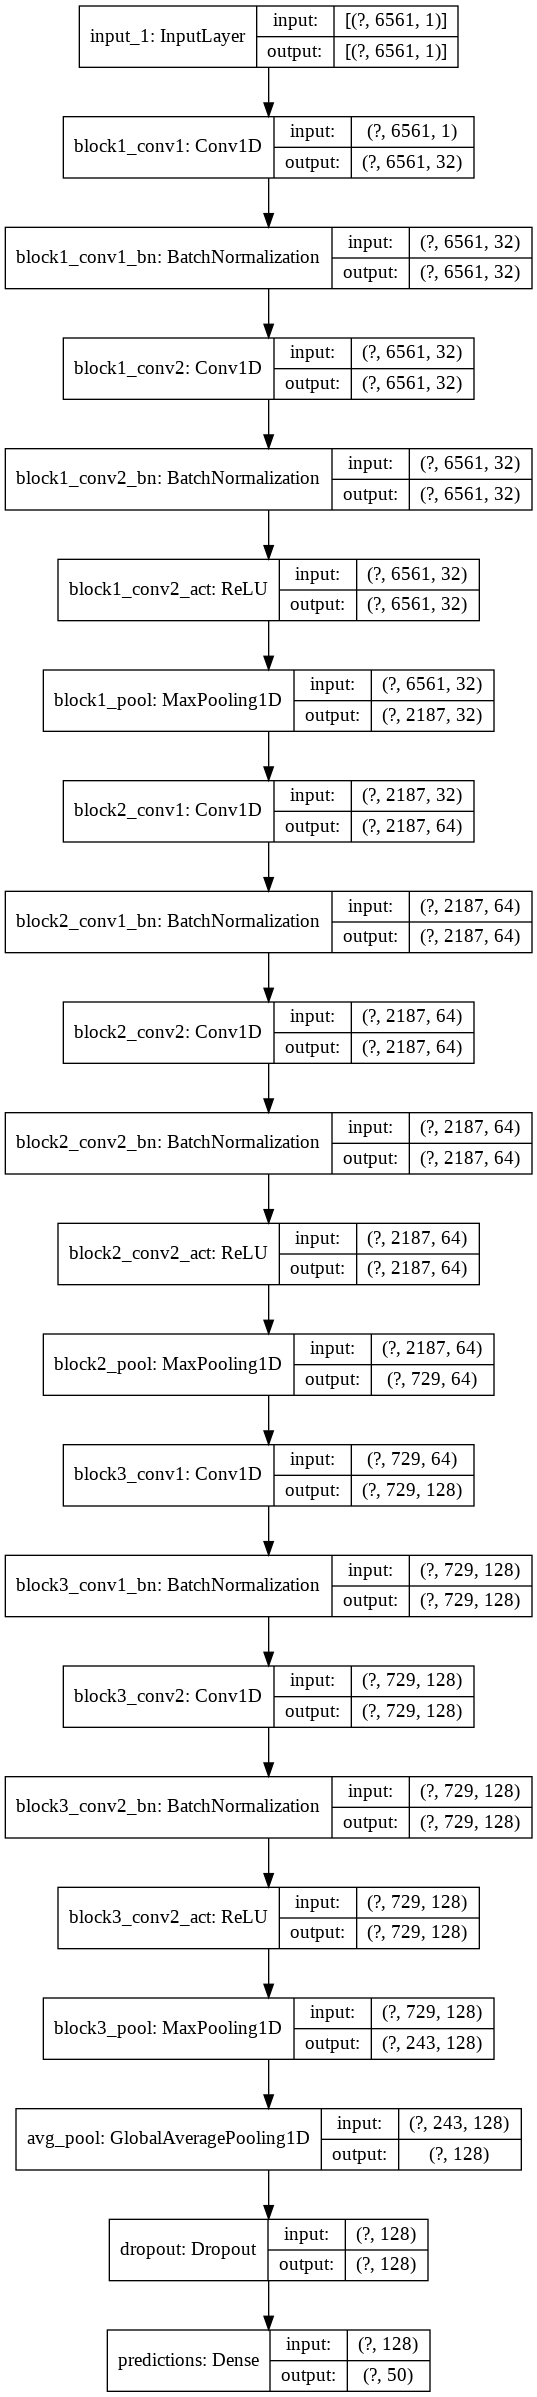

In [0]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes = True, to_file = 'model_1.png')

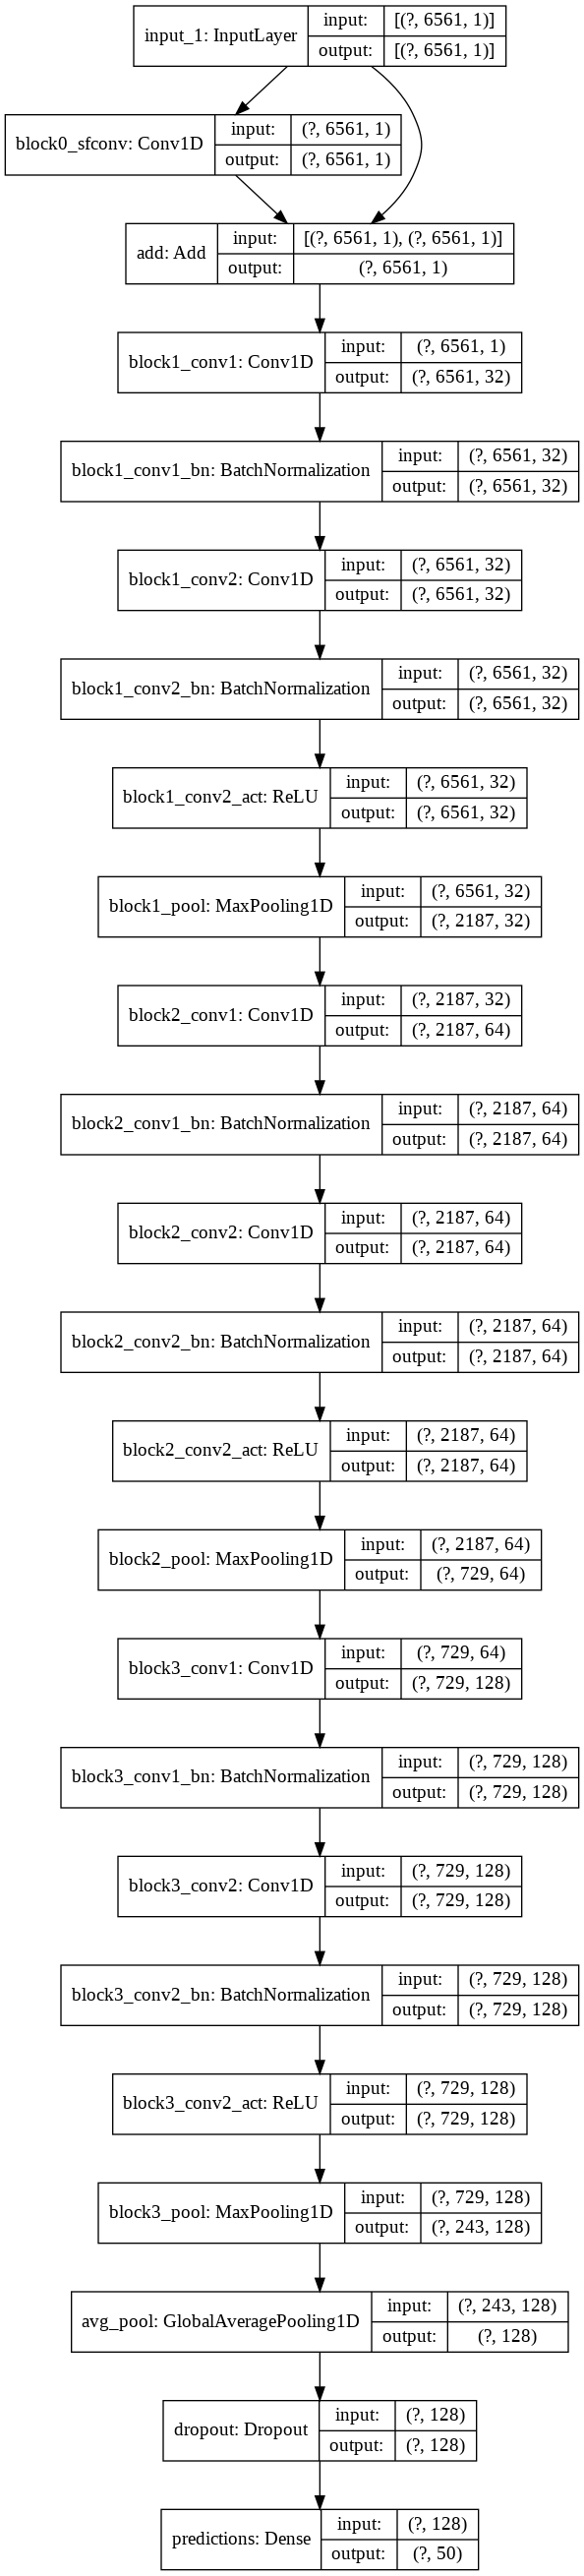

In [0]:
plot_model(model_2, show_shapes = True, to_file = 'model_2.png')

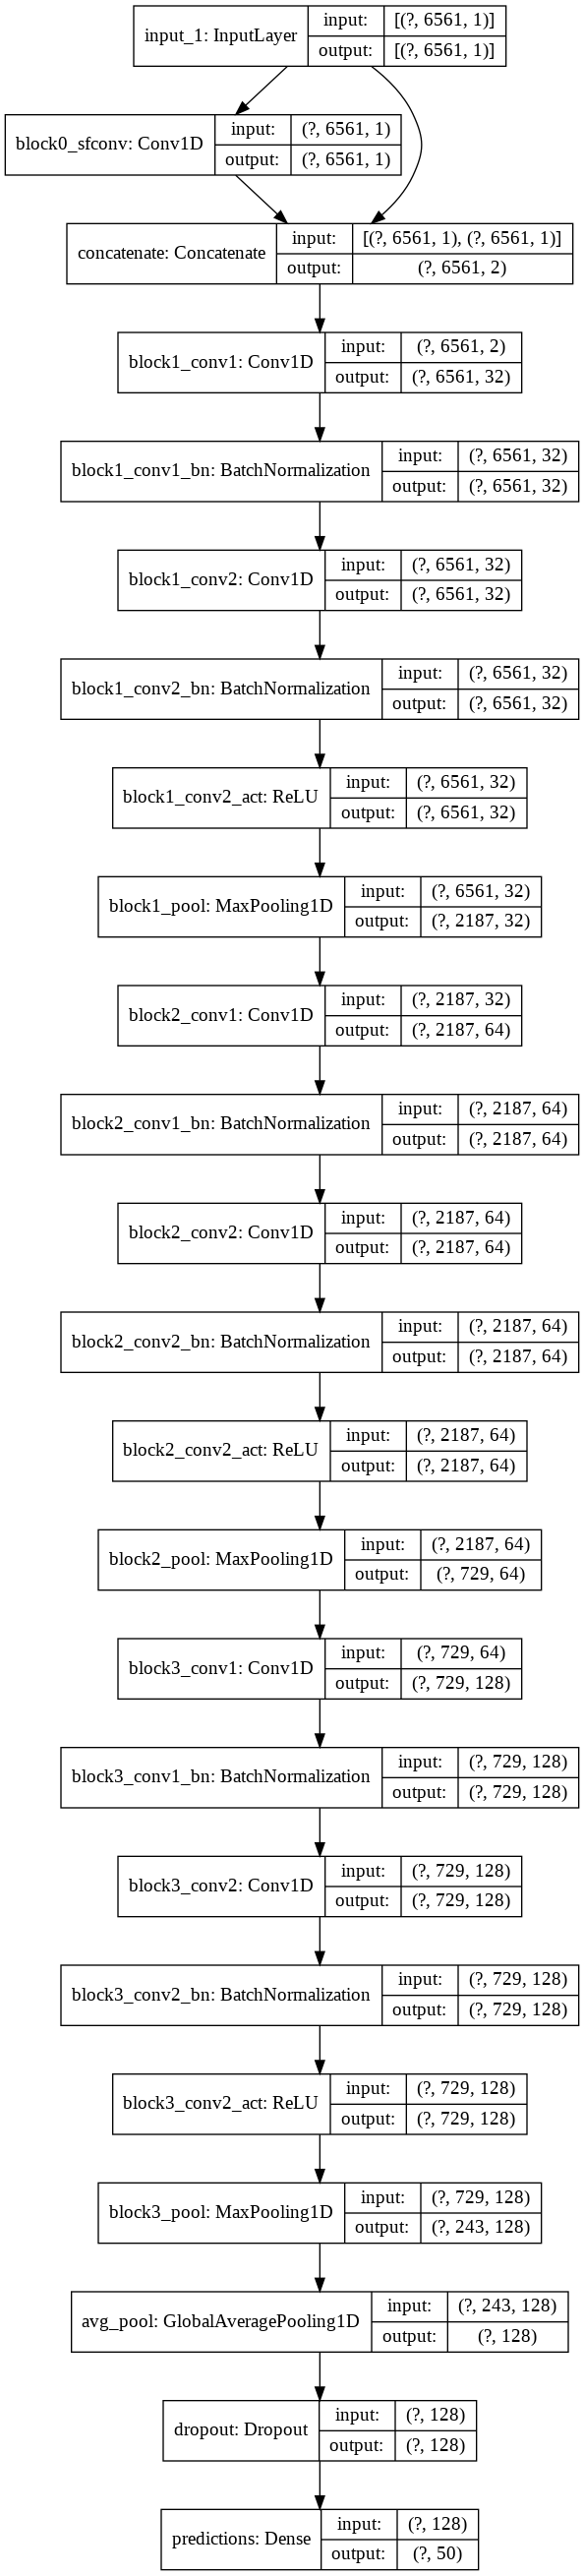

In [0]:
plot_model(model_3, show_shapes = True, to_file = 'model_3.png')

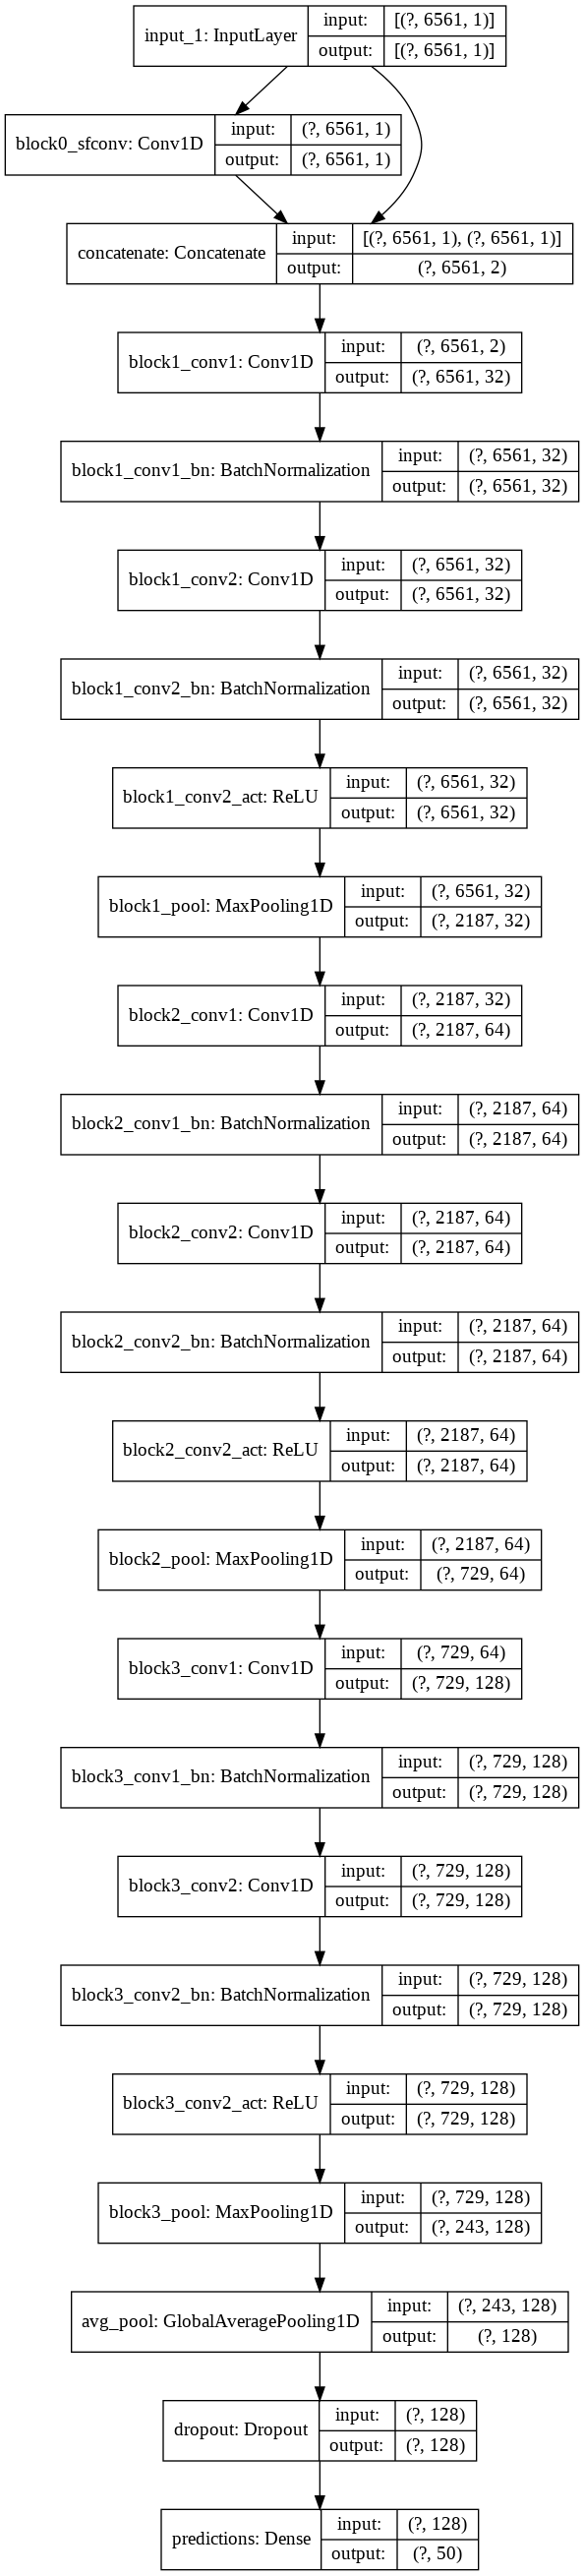

In [0]:
plot_model(model_4, show_shapes = True, to_file = 'model_4.png')

**Train model**

In [0]:
import time

def compile_and_train(model, x_train, y_train, x_val, y_val, batch_size, epochs): 
    # compile
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    # train & validate
    print("Train on {} samples, validate on {} samples...".format(x_train.shape[0], x_val.shape[0]))

    start = time.time()
    print("[  start time] {}".format(time.strftime('%c', time.localtime(time.time()))))
    history = model.fit(x_train, y_train,
                        validation_data = (x_val, y_val),
                        epochs = epochs,
                        batch_size = batch_size,
                        verbose = 0)
    end = time.time()
    print("[    end time] {}".format(time.strftime('%c', time.localtime(time.time()))))
    print("[working time] {:.2f} (sec)".format(end - start))

    # save model & results
    save_model_path = "/content/drive/My Drive/models"
    save_results_path = "/content/drive/My Drive/results"

    if not os.path.exists(save_model_path):     os.mkdir(save_model_path)
    if not os.path.exists(save_results_path):   os.mkdir(save_results_path)

    model.save(os.path.join(save_model_path, "{}_{}".format(notebookName, model.name)) + ".h5")
    np.savez_compressed(os.path.join(save_results_path,  "{}_{}".format(notebookName, model.name)),
                        accuracy = history.history['accuracy'],
                        val_accuracy = history.history['val_accuracy'],
                        loss = history.history['loss'],
                        val_loss = history.history['val_loss'],
                        working_time = np.array([end - start]))

In [0]:
def my_evaluate(model, test_data, test_labels, batch_size):
    loss, acc = model.evaluate(test_data, test_labels, batch_size = batch_size)
    print("model name: {}, test loss: {}, test_acc: {}".format(model.name, loss, acc))

    save_eval_path = "/content/drive/My Drive/evals"
    if not os.path.exists(save_eval_path):     os.mkdir(save_eval_path)

    pred = model.predict(test_data) # (1000, 50)
    np.save(os.path.join(save_eval_path,  "{}_{}".format(notebookName, model.name)), pred)

**test**

In [0]:
batch_size = 128
epochs = 500

num_models = 4
num_loop = 10

model_names = []
for i in range(num_loop):
    # train test split
    x_train, y_train, x_val, y_val, mean, std = my_split(train_data, train_labels)

    # build & compile & train model
    model_input = Input(shape = (data_length, 1))
    models = [
        build_model_1(model_input, i),
        build_model_2(model_input, i),
        build_model_3(model_input, i),
        build_model_4(model_input, i)
    ]
    
    for model in models:
        compile_and_train(model, x_train, y_train, x_val, y_val, batch_size, epochs)

    # test_data
    test_data = np.load(save_test_data_name + ".npy")
    test_labels = np.load(save_test_labels_name + ".npy")

    test_data = test_data.reshape(len(test_data), data_length, 1)
    test_labels = to_categorical(test_labels)

    # standarization
    test_data -= mean
    test_data /= std 

    for model in models:
        my_evaluate(model, test_data, test_labels, batch_size = batch_size)

model name: without_sfconv_0
model name: sfconv_ks2_0
model name: sfconv_ks3_0
model name: sfconv_ks5_0
Train on 3200 samples, validate on 800 samples...
[  start time] Sun May 17 15:55:51 2020
[    end time] Sun May 17 16:11:50 2020
[working time] 959.81 (sec)
Train on 3200 samples, validate on 800 samples...
[  start time] Sun May 17 16:11:52 2020
[    end time] Sun May 17 16:28:17 2020
[working time] 985.64 (sec)
Train on 3200 samples, validate on 800 samples...
[  start time] Sun May 17 16:28:18 2020
[    end time] Sun May 17 16:44:48 2020
[working time] 989.15 (sec)
Train on 3200 samples, validate on 800 samples...
[  start time] Sun May 17 16:44:48 2020
[    end time] Sun May 17 17:01:17 2020
[working time] 989.47 (sec)
8/8 [==============================] - 0s 19ms/step - loss: 0.3680 - accuracy: 0.8870
model name: without_sfconv_0, test loss: 0.3680259585380554, test_acc: 0.8870000243186951
8/8 [==============================] - 0s 19ms/step - loss: 0.4982 - accuracy: 0.8460
mo

In [0]:
import numpy as np
import os

previous = "20200517_3"
num_models = 4
num_loop = 10
epochs = 500

working_time = np.zeros((num_models, num_loop))
histories = np.zeros((num_models, num_loop, 4, epochs))

for i, model_name in enumerate(model_names):
    history = np.load(os.path.join("/content/drive/My Drive/results", "{}_{}.npz".format(previous, model_name)))

    histories[i % num_models, i // num_models, 0] = history['accuracy']
    histories[i % num_models, i // num_models, 1] = history['val_accuracy']
    histories[i % num_models, i // num_models, 2] = history['loss']
    histories[i % num_models, i // num_models, 3] = history['val_loss']

    working_time[i % num_models, i // num_models] = history['working_time']

In [0]:
avg_working_time = working_time.mean(axis = 1)
avg_histories = histories.mean(axis = 1)

print(avg_working_time.shape, avg_histories.shape)

(4,) (4, 4, 500)


In [0]:
mn = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

for i in range(num_models):
    print("[{}] avg working time: {:.2f} sec".format(mn[i], avg_working_time[i]))

[without sfconv] avg working time: 0.00 sec
[sfconv (kernel size = 2)] avg working time: 0.00 sec
[sfconv (kernel size = 3)] avg working time: 0.00 sec
[sfconv (kernel size = 5)] avg working time: 0.00 sec


In [0]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [0]:
import matplotlib.pyplot as plt

def plot_histories(avg_histories):
    fig = plt.figure(figsize = (10, 4), facecolor = 'white', dpi = 300)
    c = ['r', 'g', 'b', 'm']
    l = ["--", "-", ":", "-."]
    n = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

    plt.subplot(1, 2, 1)
    for i, history in enumerate(avg_histories):
        acc = history[0]
        val_acc = history[1]
        plt.plot(np.arange(1, len(val_acc) + 1, 1), 1 - np.array(smooth_curve(val_acc)),
                 color = c[i], label = n[i], alpha = .7, linewidth = 1.5, linestyle = l[i])
    plt.title('Averaged Validation Error')
    plt.xlabel('Epochs')
    plt.ylabel('Error Rate')
    plt.ylim([-0.03, 1.03])
    # plt.yscale('log')
    plt.legend()
    plt.grid(True, linewidth = 0.4)

    plt.subplot(1, 2, 2)
    for i, history in enumerate(avg_histories):
        loss = history[2]
        val_loss = history[3]
        plt.plot(np.arange(1, len(val_loss) + 1, 1), smooth_curve(val_loss),
                 color = c[i], label = n[i], alpha = .7, linewidth = 1.5, linestyle = l[i])
    plt.title('Averaged Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linewidth = 0.4)

    plt.tight_layout()
    plt.show()

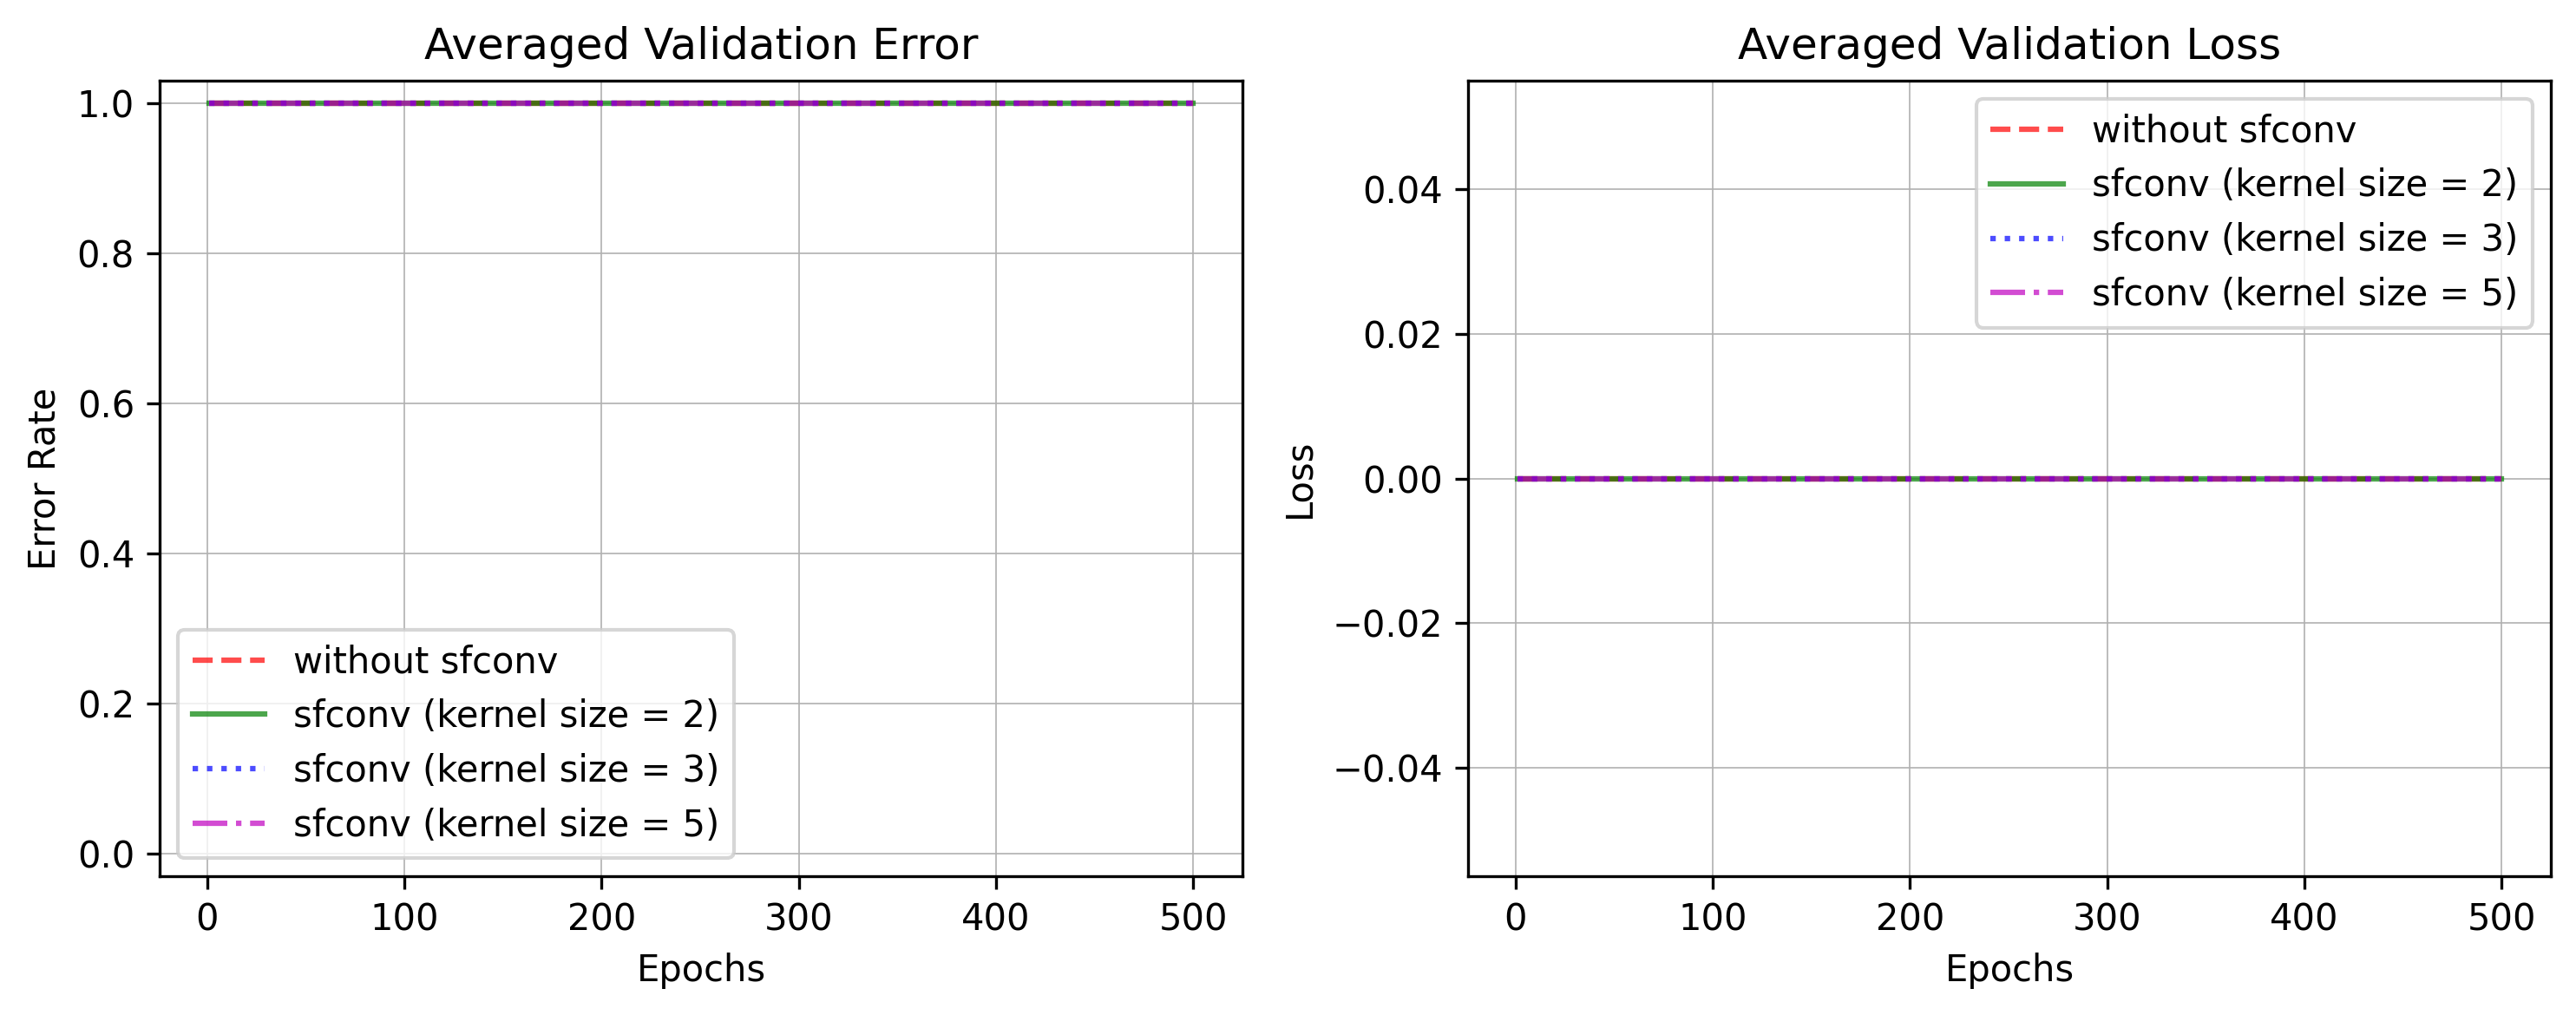

In [0]:
plot_histories(avg_histories)

In [0]:
test_labels = np.zeros((1000, 50))
num_labels = 50

In [0]:
preds = np.zeros((num_models, num_loop, test_labels.shape[0], test_labels.shape[1])) # (3, 10, 1000, 50)

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", "{}_{}.npy".format(previous, model_name))) # (1000, 50)
    preds[i % num_models, i // num_models] = pred

In [0]:
test_errors = np.zeros((num_models, num_loop))

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", "{}_{}.npy".format(previous, model_name))) # (1000, 50)
    y = np.array(sorted([i for i in range(num_labels)] * 20)) # (1000)
    
    test_errors[i % num_models, i // num_models] = np.sum(np.not_equal(np.argmax(pred, axis = 1), y)) / test_labels.shape[0]

In [0]:
test_errors

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
mn = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

for i in range(num_models):
    print("[{}] avg test error: {:.4f}".format(mn, test_errors[i].mean()))

[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] avg test error: 0.0000
[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] avg test error: 0.0000
[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] avg test error: 0.0000
[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] avg test error: 0.0000


In [0]:
cmcs = np.zeros((num_models, num_loop, 50)) # (3, 10, 50)

for i, model_name in enumerate(model_names):
    pred = np.load(os.path.join("/content/drive/My Drive/evals", "{}_{}.npy".format(previous, model_name))) # (1000, 50)
    y = np.array(sorted([i for i in range(num_labels)] * 20)) # (1000)

    a = np.array([sorted(pred[j], reverse = True).index(pred[j, y[j]]) for j in range(len(y))]) # 정답의 순위    
    cmcs[i % num_models, i // num_models] = np.array([len(a[a<=j]) / 1000 for j in range(50)])

In [0]:
print(cmcs)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


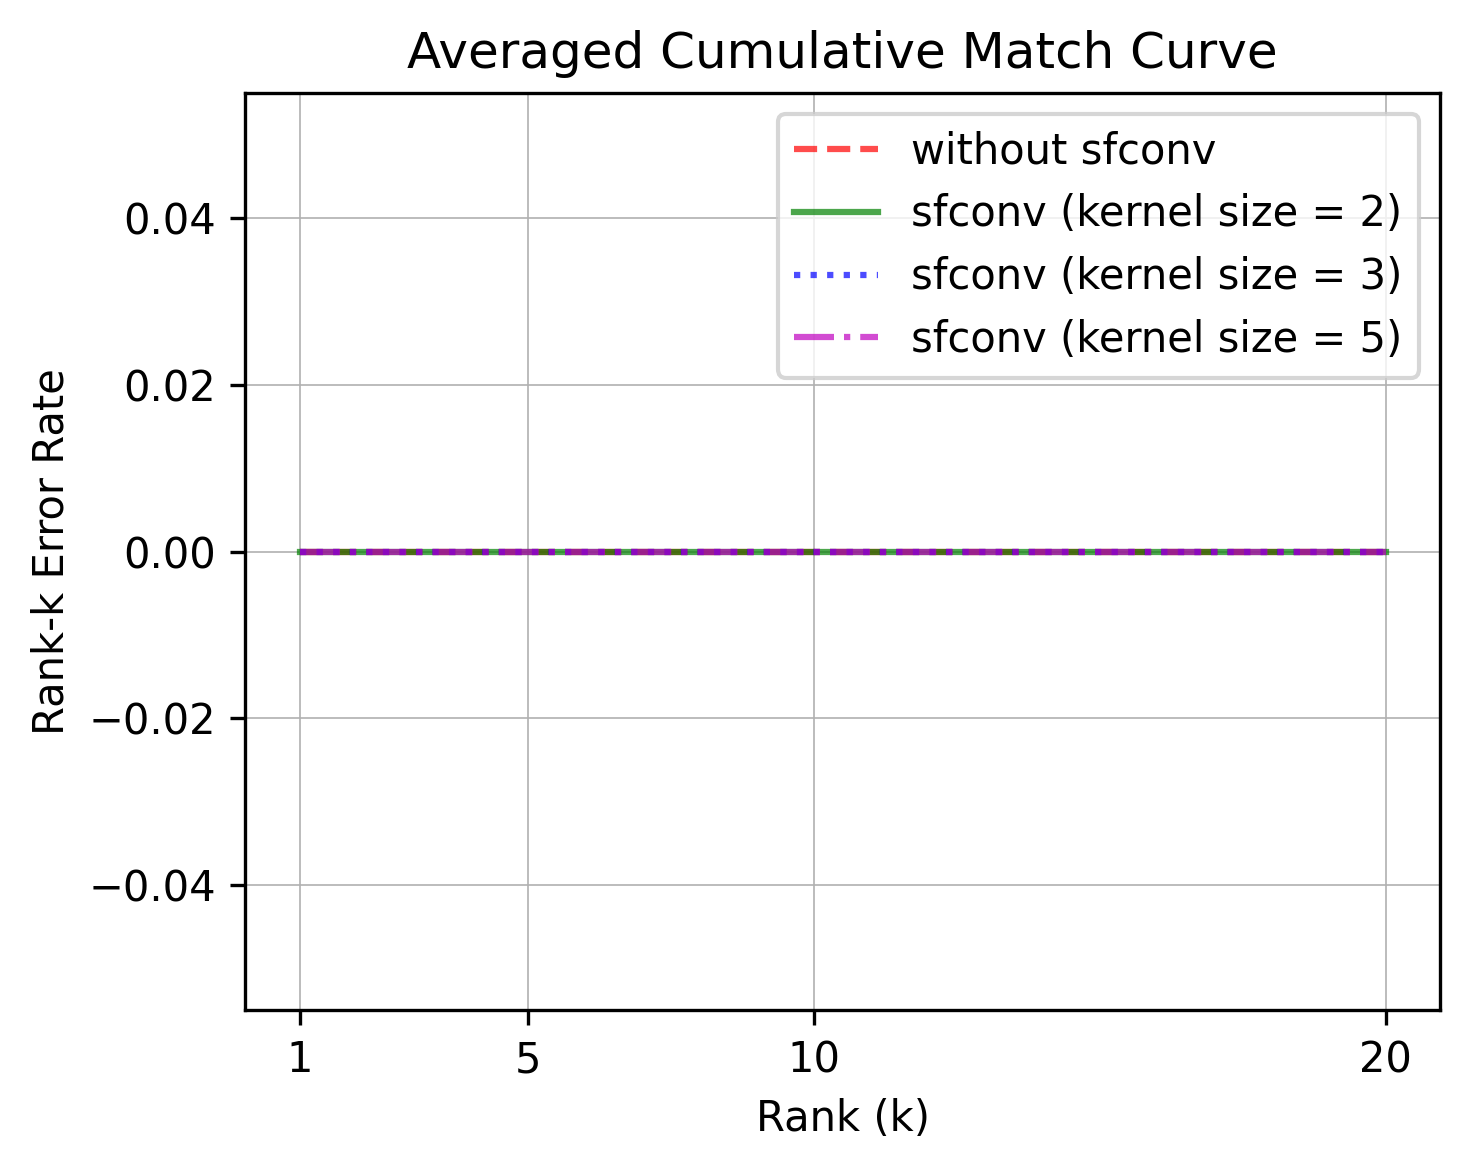

In [0]:
avg_cmcs = cmcs.mean(axis = 1)

fig = plt.figure(figsize = (5, 4), facecolor = 'white', dpi = 300)

for i, model_cmc in enumerate(avg_cmcs):
    c = ['r', 'g', 'b', 'm']
    l = ["--", "-", ":", "-."]
    n = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

    plt.plot(np.arange(1, 21, 1), model_cmc[:20],
             color = c[i], label = n[i], alpha = .7, linewidth = 1.5, linestyle = l[i])


plt.title('Averaged Cumulative Match Curve')
plt.xlabel('Rank (k)')
plt.ylabel('Rank-k Error Rate')
plt.xticks([1, 5, 10, 20])
plt.legend()
plt.grid(True, linewidth = 0.4)

plt.tight_layout()
plt.show()

In [0]:
mn = ["without sfconv", "sfconv (kernel size = 2)", "sfconv (kernel size = 3)", "sfconv (kernel size = 5)"]

for i, cmc in enumerate(avg_cmcs):
    print("[{}] top 1 error: {:.4f}, top 5 error: {:.4f}".format(mn, 1 - cmc[0], 1 - cmc[4]))

[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] top 1 error: 1.0000, top 5 error: 1.0000
[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] top 1 error: 1.0000, top 5 error: 1.0000
[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] top 1 error: 1.0000, top 5 error: 1.0000
[['without sfconv', 'sfconv (kernel size = 2)', 'sfconv (kernel size = 3)', 'sfconv (kernel size = 5)']] top 1 error: 1.0000, top 5 error: 1.0000
